# Vector DB Demo

In [2]:
from hyrax import Hyrax

h = Hyrax()

[2025-05-06 20:38:01,176 hyrax:INFO] Runtime Config read from: /home/drew/code/hyrax/src/hyrax/hyrax_default_config.toml


Quickly train a model using the default CiFAR dataset and then use the model to run inference.

In [44]:
h.config["train"]["epochs"] = 10
h.train()
h.infer()

[2025-05-05 21:24:13,608 hyrax.models.model_registry:INFO] Using criterion: torch.nn.CrossEntropyLoss with default arguments.
2025-05-05 21:24:13,614 ignite.distributed.auto.auto_dataloader INFO: Use data loader kwargs for dataset '<hyrax.data_sets.hyr': 
	{'sampler': <hyrax.pytorch_ignite.SubsetSequentialSampler object at 0x7f11bdcdb3b0>, 'batch_size': 512, 'shuffle': False, 'pin_memory': True}
2025-05-05 21:24:13,616 ignite.distributed.auto.auto_dataloader INFO: Use data loader kwargs for dataset '<hyrax.data_sets.hyr': 
	{'sampler': <hyrax.pytorch_ignite.SubsetSequentialSampler object at 0x7f11bdcd9b80>, 'batch_size': 512, 'shuffle': False, 'pin_memory': True}
2025/05/05 21:24:13 INFO mlflow.system_metrics.system_metrics_monitor: Started monitoring system metrics.
[2025-05-05 21:24:13,665 hyrax.pytorch_ignite:INFO] Training model on device: cuda


  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

  2%|1         | 1/59 [00:00<?, ?it/s]

[2025-05-05 21:25:43,484 hyrax.pytorch_ignite:INFO] Total training time: 89.82[s]
[2025-05-05 21:25:43,484 hyrax.pytorch_ignite:INFO] Latest checkpoint saved as: /home/drew/code/hyrax/docs/pre_executed/results/20250505-212406-train-ID7T/checkpoint_epoch_10.pt
[2025-05-05 21:25:43,485 hyrax.pytorch_ignite:INFO] Best metric checkpoint saved as: /home/drew/code/hyrax/docs/pre_executed/results/20250505-212406-train-ID7T/checkpoint_10_loss=-115.1023.pt
2025/05/05 21:25:43 INFO mlflow.system_metrics.system_metrics_monitor: Stopping system metrics monitoring...
2025/05/05 21:25:43 INFO mlflow.system_metrics.system_metrics_monitor: Successfully terminated system metrics monitoring!
[2025-05-05 21:25:43,500 hyrax.train:INFO] Finished Training
[2025-05-05 21:25:43,756 hyrax.model_exporters:INFO] Exported model to ONNX format: /home/drew/code/hyrax/docs/pre_executed/results/20250505-212406-train-ID7T/example_model_opset_20.onnx
[2025-05-05 21:25:51,103 hyrax.models.model_registry:INFO] Using crit

  1%|1         | 1/98 [00:00<?, ?it/s]

[2025-05-05 21:26:02,131 hyrax.pytorch_ignite:INFO] Total evaluation time: 10.74[s]
[2025-05-05 21:26:02,894 hyrax.verbs.infer:INFO] Inference Complete.
[2025-05-05 21:26:02,929 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.
[2025-05-05 21:26:02,930 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.
[2025-05-05 21:26:02,931 hyrax.config_utils:WARNING] Cannot find default_config.toml for umap.


Use the output of inference to populate a ChromaDB vector database.

In [45]:
h.index()

[2025-05-05 21:26:47,163 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.
[2025-05-05 21:26:47,164 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.
[2025-05-05 21:26:47,165 hyrax.config_utils:WARNING] Cannot find default_config.toml for umap.
[2025-05-05 21:26:54,821 hyrax.verbs.vdb_index:INFO] Number of inference result batches to index: 98.
100%|██████████| 98/98 [00:10<00:00,  9.05it/s]


Some examples of simple database operations. Here we get the directory that contains the vector database that was just populated and create an instance of the ChromaDB object for querying.

In [3]:
from hyrax.vector_dbs import ChromaDB
from hyrax.config_utils import find_most_recent_results_dir

context = {"results_dir": find_most_recent_results_dir(h.config, "index")}
cdb = ChromaDB({}, context)

Next we'll retrieve the vectors associated with two ids. The result is a dictionary where the keys are id strings and values are the numpy array vectors stored in the vector database.

In [4]:
results = cdb.get_by_id(ids=["97", "99", "334", "19022"])

for k, v in results.items():
    print(f"Id: {k}, Vector: {v}")

Id: 97, Vector: [ 0.03944793  0.3558799   0.25223956 -0.0754521   1.21438968 -0.20974497
  0.1351877  -0.32994613 -0.31074765 -0.35594231 -0.34430811 -0.20604473
  0.45631796  0.43832898  0.39286935 -0.68292439 -0.43553033  0.2303443
  0.07766815  0.10676508  0.05971036 -0.58332515 -0.85855955  0.27715769
  0.29078636  0.35345447 -0.66003358 -0.21075204  0.6518687   0.41284499
  0.14182426  0.28613818 -0.52455962  0.50611925  0.04625352 -0.3224065
  0.3642571  -0.36285824 -0.10188343  0.20414513  0.24323951  0.61370313
 -0.08387056 -0.32608244 -0.41909656  0.83472192  0.29513356 -0.05968503
  0.65934277 -0.46486792 -0.00231487 -0.07055005 -0.17652111  0.30367675
  0.28033113  0.41673368  0.70939934  0.50588834 -0.09763379 -0.34357762
 -0.06451014  0.25463673 -0.59559703  0.27798894]
Id: 99, Vector: [ 0.73876572  0.19451125  0.14610657 -0.51498705  0.61082381  0.39704716
 -0.43067837  0.31517011  0.65467519  0.8016476   0.32953    -0.07402328
  0.48097423 -0.41715565  0.17189725 -0.1279

Here we'll search for the 5 nearest neighbors of the vector with id = '334'. Note that the closest of the 5 neighbors is the vector itself, since it's in the database.

In [5]:
cdb.search_by_id("3133", k=5)

{0: ['3133', '3608', '30942', '37903', '30307']}

We can repeat the search, using the vector that we found when running `get_by_id`. The results from this search should match those of `search_by_id`.

In [42]:
neighbors = cdb.search_by_vector([results["99"]], k=2)

In [7]:
dataset = h.prepare()

[2025-05-06 20:38:13,897 hyrax.prepare:INFO] Finished Prepare


In [21]:
import numpy as np
from matplotlib import pyplot as plt


def show_image(data):
    image = data["image"]
    title = f"Label: {data['label']}, Id: {data['object_id']}"
    image = image.permute(1, 2, 0).numpy()
    min_val = np.min(image)
    max_val = np.max(image)
    image = (image - min_val) / (max_val - min_val)
    plt.imshow(image)
    if title:
        plt.title(title)
    plt.axis("off")
    plt.show()

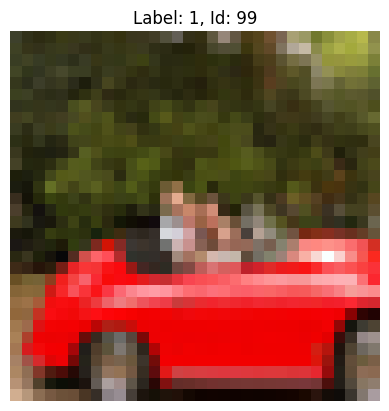

In [22]:
d = dataset[99]
show_image(d)

hello


AttributeError: 'Axes' object has no attribute 'flatten'

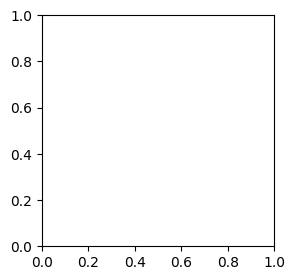

In [44]:
def show_image_grid(data_list):
    """
    Display a grid of images.

    Parameters
    ----------
    data_list : list
        A list of data dictionaries, each containing an 'image' key and optionally 'label' and 'object_id'.
    """
    rows = int(len(data_list) / 4)
    if len(data_list) % 4 != 0:
        rows += 1
    cols = 4
    if rows == 1:
        cols = len(data_list)
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))
    axes = axes.flatten()  # Flatten the axes for easy iteration

    for ax, data in zip(axes, data_list):
        image = data["image"]
        title = f"Label: {data.get('label', 'N/A')}, Id: {data.get('object_id', 'N/A')}"
        image = image.permute(1, 2, 0).numpy()
        min_val = np.min(image)
        max_val = np.max(image)
        image = (image - min_val) / (max_val - min_val)  # Normalize to [0, 1]
        ax.imshow(image)
        ax.set_title(title)
        ax.axis("off")

    # Turn off any unused axes
    for ax in axes[len(data_list) :]:
        ax.axis("off")

    plt.tight_layout()
    plt.show()


# Example usage
data_list = []
nearest_neighbors = neighbors[0]
for n in nearest_neighbors[1:]:
    data_list.append(dataset[int(n)])

show_image_grid(data_list)

In [34]:
a = [dataset[int(i)] for i in nearest_neighbors[1:]]
print(a)

[{'object_id': 49594, 'image': tensor([[[-0.7882, -0.6235, -0.3725,  ..., -0.4353, -0.4902, -0.4824],
         [-0.6941, -0.7647, -0.6471,  ..., -0.4510, -0.6314, -0.5373],
         [-0.6078, -0.5059, -0.4039,  ..., -0.4980, -0.6471, -0.4667],
         ...,
         [-0.5765, -0.2863,  0.0745,  ..., -0.8824, -0.7882, -0.8118],
         [-0.4667,  0.0510,  0.2314,  ..., -0.7804, -0.8118, -0.4510],
         [-0.5059,  0.3255,  0.3804,  ..., -0.7490, -0.4824, -0.2078]],

        [[-0.7882, -0.6157, -0.3569,  ..., -0.4431, -0.4588, -0.4431],
         [-0.6941, -0.7647, -0.6235,  ..., -0.4824, -0.6235, -0.4902],
         [-0.6000, -0.4980, -0.4039,  ..., -0.5137, -0.6471, -0.4196],
         ...,
         [-0.6078, -0.3882, -0.2000,  ..., -0.9059, -0.8588, -0.8667],
         [-0.5137, -0.0118,  0.0353,  ..., -0.8196, -0.8353, -0.5608],
         [-0.5529,  0.2706,  0.2706,  ..., -0.8039, -0.6000, -0.3725]],

        [[-0.8824, -0.7882, -0.6235,  ..., -0.8196, -0.8196, -0.7961],
         [-0.8